In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_excel(r'D:\paper\safety\data\max_accident_data\accident_type.xlsx')
data_area = df.copy().drop('Unnamed: 6',axis =1)
data_area.columns = ['time','province','city','accident','death','injury']
data_area.head()

,time,province,city,accident,death,injury
0,2005-01-05,山西,运城市平陆县境内平风线,翻车,12.0,12.0
1,2005-01-06,福建,莆田市同三线高速公路莆田灵川路段,车辆失控,28.0,19.0
2,2005-01-11,山西,临汾市襄汾县京安村襄浏花炮厂装配车间,爆炸,25.0,10.0
3,2005-01-12,河南,洛阳市宜阳县城关乡乔岩直井煤矿,瓦斯燃烧,10.0,17.0
4,2005-01-16,重庆,南川区南城街道办事处云华煤业有限公司,煤与瓦斯突出,12.0,NaN


In [3]:
data_area['province'].value_counts()

山西     70
贵州     60
湖南     54
云南     52
河南     49
山东     41
四川     38
广东     36
黑龙江    35
河北     33
浙江     31
陕西     28
辽宁     28
湖北     27
江苏     27
江西     26
新疆     26
重庆     24
吉林     23
安徽     20
广西     19
福建     18
内蒙古    18
甘肃     15
西藏     14
宁夏     10
天津      8
上海      8
海南      5
青海      4
北京      3
 河南     1
 湖南     1
 江苏     1
Name: province, dtype: int64

In [4]:
len(data_area['province'].value_counts().index)
#最后的三个数据是统计时候多打了一个空格，因此需要处理一下

34

In [5]:
data_area['province'].str.replace(" ","").value_counts()
#处理完毕，为了保护数据，不要直接在原数据上进行更改

山西     70
贵州     60
湖南     55
云南     52
河南     50
山东     41
四川     38
广东     36
黑龙江    35
河北     33
浙江     31
辽宁     28
陕西     28
江苏     28
湖北     27
江西     26
新疆     26
重庆     24
吉林     23
安徽     20
广西     19
内蒙古    18
福建     18
甘肃     15
西藏     14
宁夏     10
上海      8
天津      8
海南      5
青海      4
北京      3
Name: province, dtype: int64

In [6]:
#上述步骤就是为了查看数据情况，重新筛选数据进行处理
data = data_area[['time','province']]
data['province'] = data['province'].apply(lambda x : x.replace(" ",""))
data['province'].value_counts()

山西     70
贵州     60
湖南     55
云南     52
河南     50
山东     41
四川     38
广东     36
黑龙江    35
河北     33
浙江     31
辽宁     28
陕西     28
江苏     28
湖北     27
江西     26
新疆     26
重庆     24
吉林     23
安徽     20
广西     19
内蒙古    18
福建     18
甘肃     15
西藏     14
宁夏     10
上海      8
天津      8
海南      5
青海      4
北京      3
Name: province, dtype: int64

In [7]:
len(data['province'].value_counts())

31

In [8]:
data.head()

,time,province
0,2005-01-05,山西
1,2005-01-06,福建
2,2005-01-11,山西
3,2005-01-12,河南
4,2005-01-16,重庆


In [9]:
#添加事故数量
data['accident_num'] = 1
data.set_index('time',inplace = True)

In [10]:
def get_zone_data(data):
    df = pd.DataFrame()
    for name in data['province'].unique():
        df_ = data[data["province"] == name].resample('Y').sum()
        df_.columns = [name]
        df = pd.concat([df,df_.T])
    df = df.T.to_period(freq="Y")
    return df 

In [11]:
data_zone = get_zone_data(data).T
data_zone.fillna(0,inplace = True)
data_zone = data_zone.astype(int)
data_zone

time,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
山西,14,9,13,11,7,4,3,3,1,1,1,1,1,0,1
福建,2,4,1,3,2,2,1,2,1,0,0,0,0,0,0
河南,6,3,5,8,2,6,7,2,1,0,3,2,2,2,1
重庆,6,3,3,2,3,1,1,1,0,2,0,1,0,1,0
广东,8,3,3,3,2,5,3,0,1,3,1,1,1,2,0
海南,2,1,0,0,0,1,1,0,0,0,0,0,0,0,0
辽宁,3,1,8,5,1,3,1,3,0,0,1,1,0,1,0
云南,7,13,4,3,6,2,4,3,3,3,0,2,1,0,1
陕西,5,4,2,4,0,1,3,2,1,1,1,0,1,1,2
江苏,4,1,2,3,1,7,4,2,1,1,0,0,0,0,2


In [12]:
data_zone['sum'] = data_zone.sum(axis=1)
data_zone['account'] = data_zone['sum'] / data_zone['sum'].sum()
data_zone['account'] = data_zone['account'].map(lambda x: f'{round(x*100,2)}%')
data_zone = data_zone.sort_values(by = 'account',ascending=False)
data_zone

time,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,sum,account
山西,14,9,13,11,7,4,3,3,1,1,1,1,1,0,1,70,8.21%
贵州,12,6,6,5,5,5,6,3,2,1,2,2,2,1,2,60,7.03%
湖南,5,6,6,5,6,5,5,5,1,2,1,1,3,1,3,55,6.45%
云南,7,13,4,3,6,2,4,3,3,3,0,2,1,0,1,52,6.1%
河南,6,3,5,8,2,6,7,2,1,0,3,2,2,2,1,50,5.86%
山东,3,3,3,4,7,3,2,3,3,0,3,3,1,1,2,41,4.81%
四川,4,5,4,4,2,7,2,4,2,1,0,1,0,2,0,38,4.45%
广东,8,3,3,3,2,5,3,0,1,3,1,1,1,2,0,36,4.22%
黑龙江,6,2,2,7,5,4,1,1,2,0,2,0,2,1,0,35,4.1%
河北,8,3,4,4,5,2,1,1,0,0,1,0,2,1,1,33,3.87%


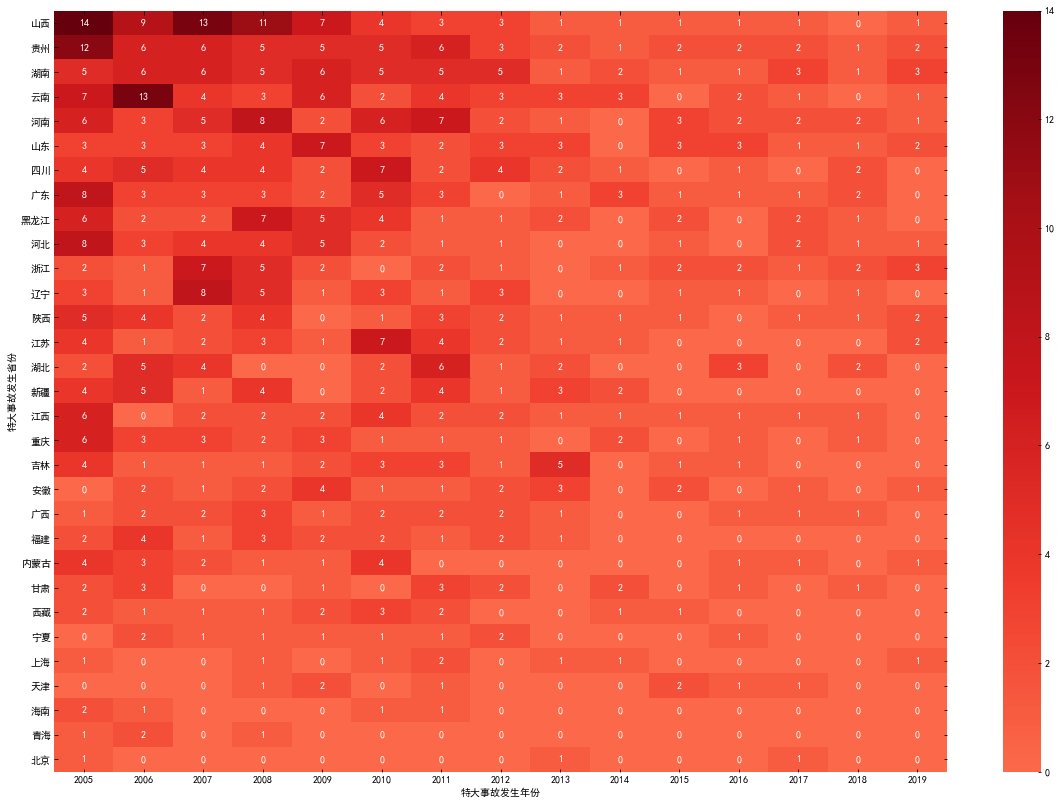

In [13]:
import seaborn as sns
plt.figure(figsize=(20,14))
sns.heatmap(data_zone[data_zone.columns[:-2]],
            annot = True,     
            fmt = 'd',
            center = 0,
            cmap = 'Reds'
           )
plt.xlabel('特大事故发生年份')
plt.ylabel('特大事故发生省份')
plt.savefig(r'D:\paper\safety\max_accident_img\zone_analysis.png',dpi =200)